In [1]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.2 MB/s eta 0:00:0000:010:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
kfp 1.8.20 requires google-api-python-client<2,>=1.7.8, but you have google-api-python-client 2.86.0 which is incompatible.
kfp 1.8.20 requires PyYAML<6,>=5.3, but you have pyyaml 6.0 which is incompatible.
gcsfs 2023.3.0 requires fsspec==2023.3.0, but you have fsspec 2023.4.0 which is incompatible.
beatrix-jupyterlab 2023.46.184821 requires jupyter-server~=1.16, but you have jupyter-server 2.5.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you

In [2]:
import keras
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Load the saved model**

In [3]:
model = keras.models.load_model('/kaggle/input/mobile-net-model/model/mobile_model.h5')

In [4]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

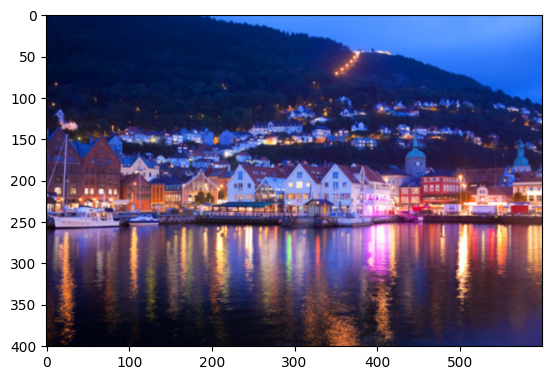

1/1 [==============================] - 1s 786ms/step
Fire : 0.08%  |Not Fire: 99.9%
No Fire detected





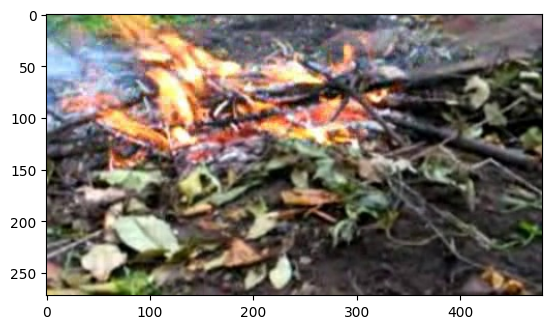

1/1 [==============================] - 0s 52ms/step
Fire : 99.9%  |Not Fire: 0.06%
Fire detected





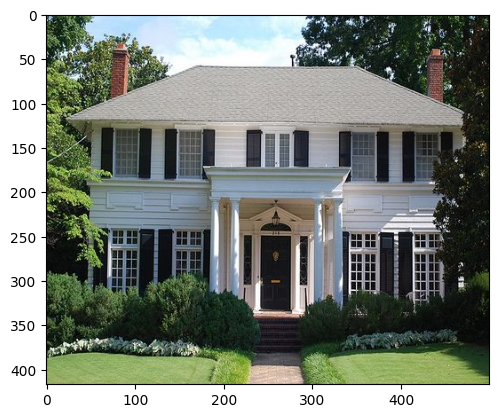

1/1 [==============================] - 0s 61ms/step
Fire : 0.00%  |Not Fire: 99.9%
No Fire detected





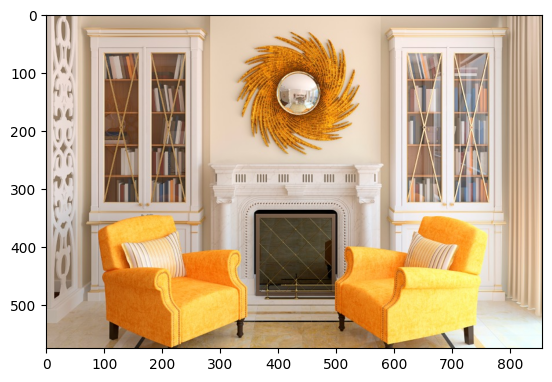

1/1 [==============================] - 0s 54ms/step
Fire : 0.17%  |Not Fire: 99.8%
No Fire detected





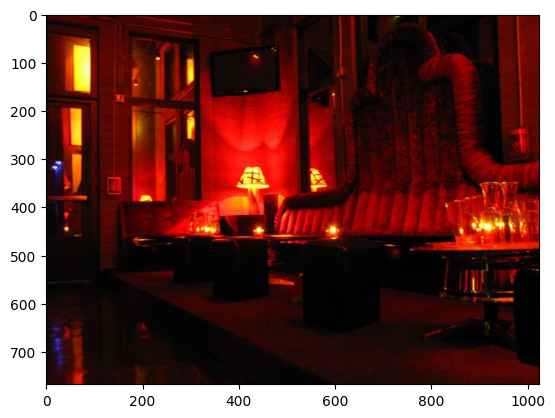

1/1 [==============================] - 0s 55ms/step
Fire : 0.03%  |Not Fire: 99.9%
No Fire detected





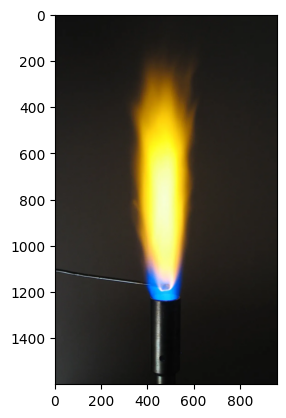

1/1 [==============================] - 0s 52ms/step
Fire : 95.4%  |Not Fire: 4.57%
Fire detected





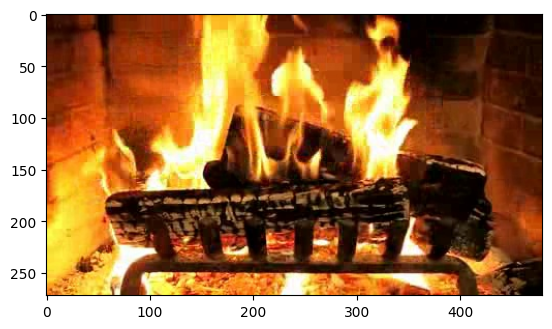

1/1 [==============================] - 0s 55ms/step
Fire : 99.9%  |Not Fire: 0.00%
Fire detected





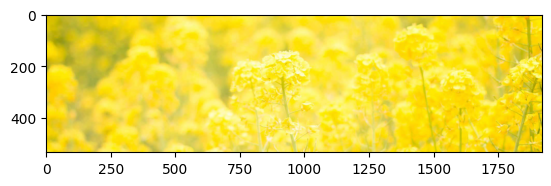

1/1 [==============================] - 0s 60ms/step
Fire : 45.1%  |Not Fire: 54.8%
No Fire detected





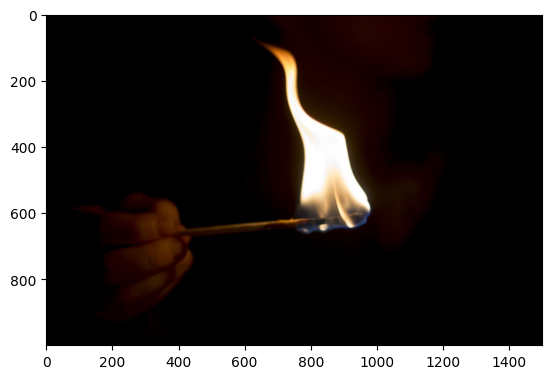

1/1 [==============================] - 0s 58ms/step
Fire : 55.4%  |Not Fire: 44.5%
Fire detected





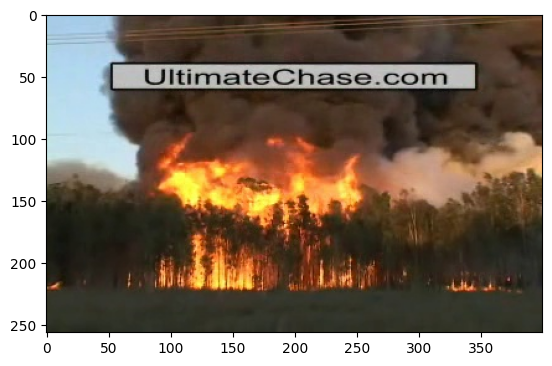

1/1 [==============================] - 0s 48ms/step
Fire : 99.9%  |Not Fire: 0.07%
Fire detected





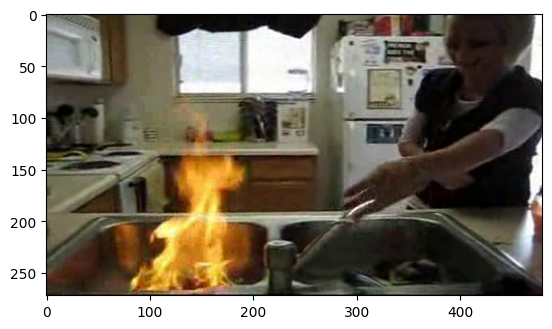

1/1 [==============================] - 0s 60ms/step
Fire : 99.9%  |Not Fire: 0.00%
Fire detected





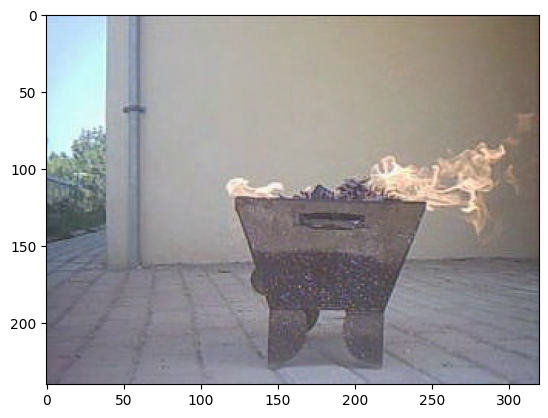

1/1 [==============================] - 0s 51ms/step
Fire : 99.3%  |Not Fire: 0.69%
Fire detected





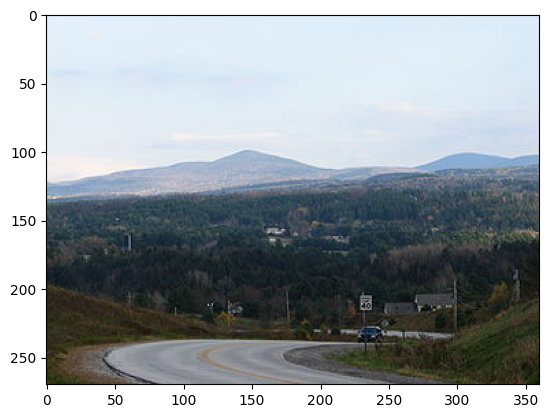

1/1 [==============================] - 0s 45ms/step
Fire : 0.08%  |Not Fire: 99.9%
No Fire detected





In [5]:
dir_path = '/kaggle/input/fire-predict/'
for img in os.listdir(dir_path):
    file_path = dir_path+img
    
    #Display image
    mp_image = mpimg.imread(file_path)
    plt.imshow(mp_image)
    plt.show()
    
    preprocessed_image = prepare_image(dir_path+img)
    predictions = model.predict(preprocessed_image)
    print("Fire :",str(predictions[0][0]*100)[:4] + "%"," |Not Fire:",str(predictions[0][1]*100)[:4]+"%")
    labels=(predictions>0.5).astype(int)
    if labels[0][0]==1 :
        print("Fire detected")
    else:
        print("No Fire detected")
    print("\n\n")    